In [1]:
#Imports 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from visual_func import visualisation

In [117]:
#Download data

file_path = "Provided_data/Ad_Spend.xlsx"
overview = pd.read_excel(file_path, sheet_name="Overview", header=1)

In [3]:
#Drop noise columns

overview = overview.loc[:, ~overview.columns.str.contains("Unnamed")]
overview = overview.loc[:17]


In [4]:
overview.head(2)

,Week Number,US-Spend,CA-Spend,UK-Spend,FR-Spend,US-Installs,CA-Installs,UK-Installs,FR-Installs,US-Signups,...,US-CAC,CA-CAC,UK-CAC,FR-CAC,Total Spend,Total Installs,Total Signups,% Signed up,CPI,CAC
0,35,176.2,47.400,189.0,826.2,374,145,370,3378,216,...,0.815741,0.623684,0.979275,0.494434,1238.800,4267,2156,0.505273,0.290321,0.574583
1,36,1177.2,380.962,992.8,1926.4,2442,897,2358,6240,1547,...,0.760957,0.695186,0.926984,0.599005,4477.362,11937,6382,0.534640,0.375083,0.701561


In [5]:
overview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Week Number     18 non-null     int64  
 1   US-Spend        18 non-null     float64
 2   CA-Spend        18 non-null     float64
 3   UK-Spend        18 non-null     float64
 4   FR-Spend        18 non-null     float64
 5   US-Installs     18 non-null     int64  
 6   CA-Installs     18 non-null     int64  
 7   UK-Installs     18 non-null     int64  
 8   FR-Installs     18 non-null     int64  
 9   US-Signups      18 non-null     int64  
 10  CA-Signups      18 non-null     int64  
 11  UK-Signups      18 non-null     int64  
 12  FR-Signups      18 non-null     int64  
 13  US-% Signups    18 non-null     float64
 14  CA-% Signups    18 non-null     float64
 15  UK-% Signups    18 non-null     float64
 16  FR-% Signups    18 non-null     float64
 17  US-CAC          18 non-null     float

## KPIs observation 

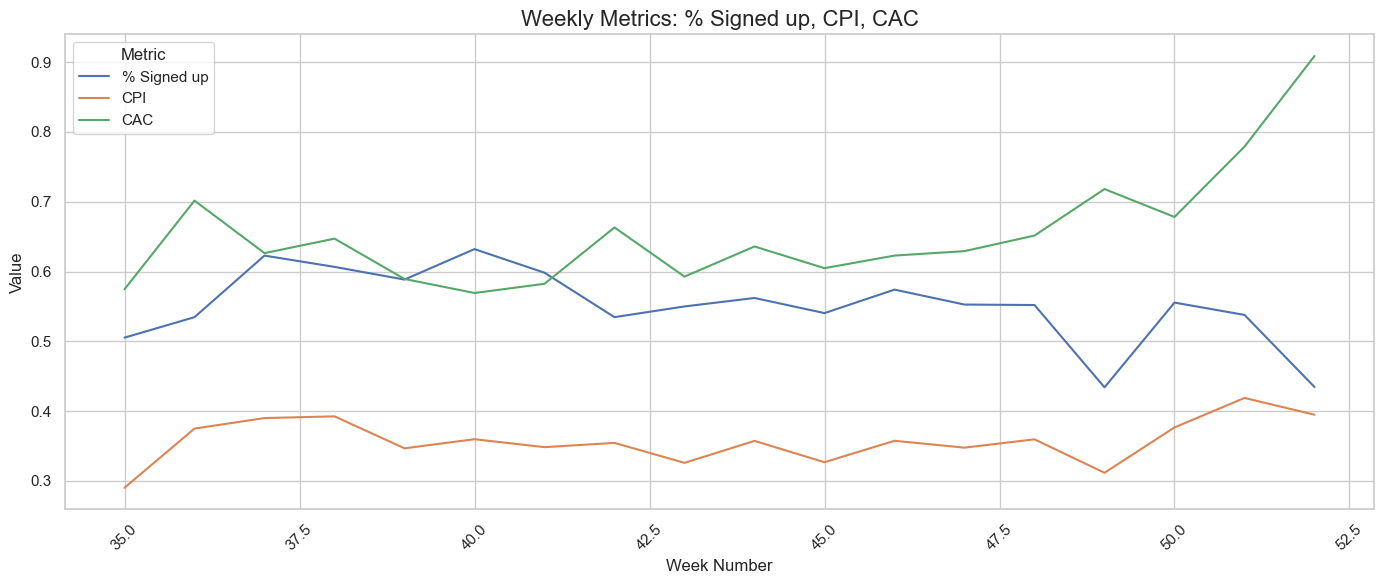

In [6]:
# Progress over time the most importants KPIs 

metrics = ["% Signed up", "CPI", "CAC"]
visualisation(metrics, overview) 

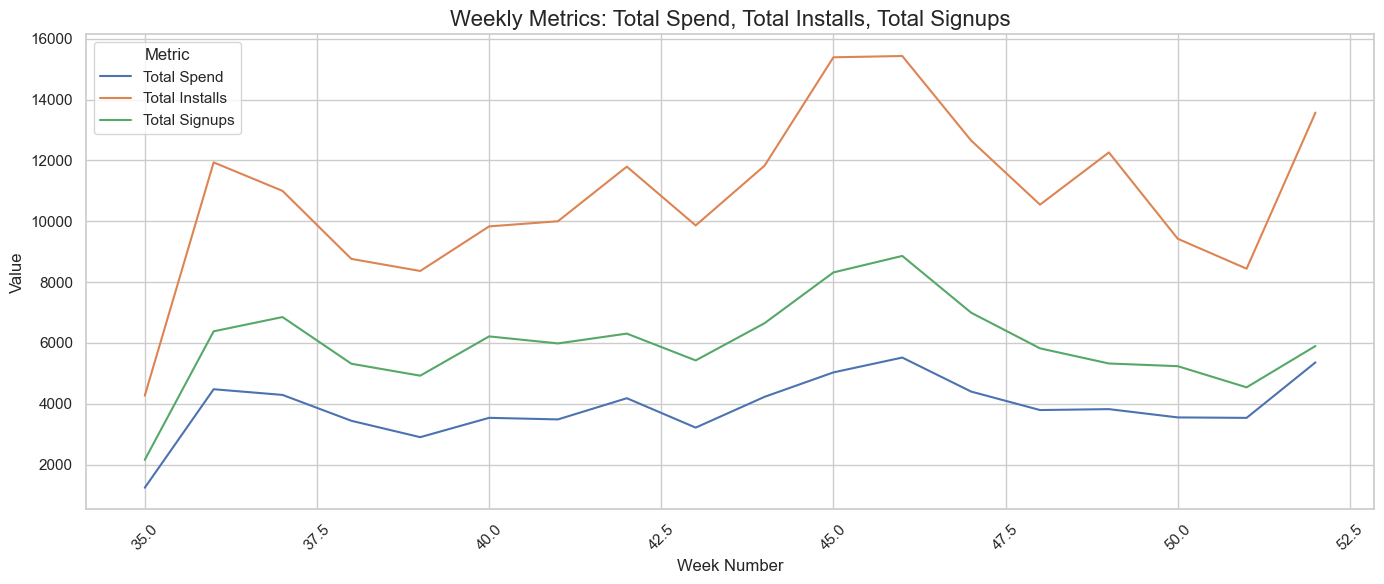

In [8]:
# Progress over time total parameters 

totals = ["Total Spend", "Total Installs", "Total Signups"]

visualisation(totals, overview)

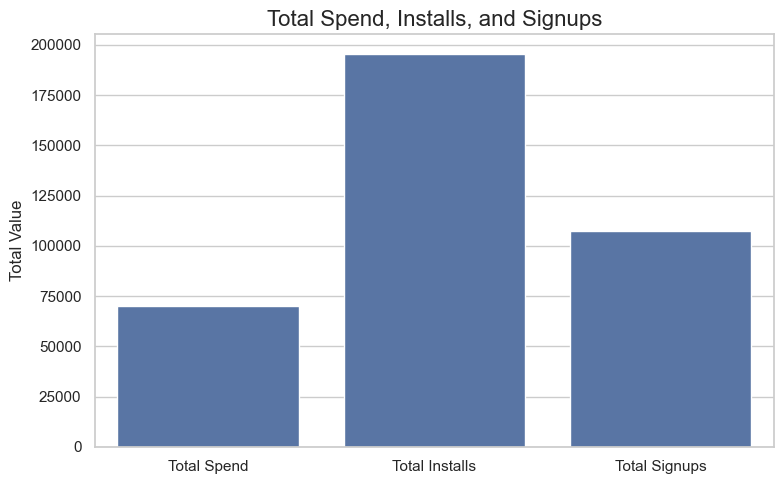

In [11]:
# Totals visualisation  

summary = overview[["Total Spend", "Total Installs", "Total Signups"]].sum()

summary_totals = summary.reset_index()
summary_totals.columns = ["Metric", "Value"]

plt.figure(figsize=(8, 5))
sns.barplot(
    data=summary_totals,
    x="Metric",
    y="Value"
)

plt.title("Total Spend, Installs, and Signups", fontsize=16)
plt.xlabel("")
plt.ylabel("Total Value")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [73]:
summary_totals

,Metric,Value
0,Total Spend,70010.334
1,Total Installs,195392.000
2,Total Signups,107203.000


In [75]:
# Total avg CPI ans CAC

avg_cpi = overview["CPI"].mean()
avg_cac = overview["CAC"].mean()

print("Average CPI:", avg_cpi)
print("Average CAC:", avg_cac)

Average CPI: 0.3574993009333334
Average CAC: 0.6541241473555556


## Country breakdown

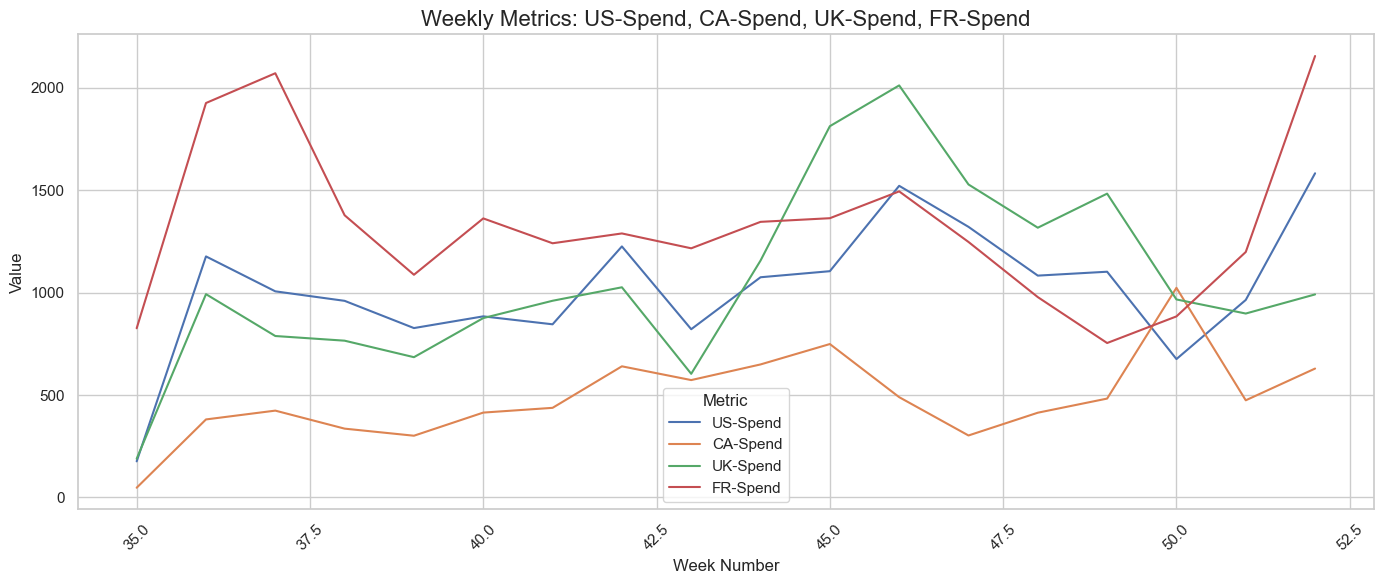

In [13]:
# Weekly spend by country

spend_cols = ["US-Spend", "CA-Spend", "UK-Spend", "FR-Spend"]

visualisation(spend_cols, overview)


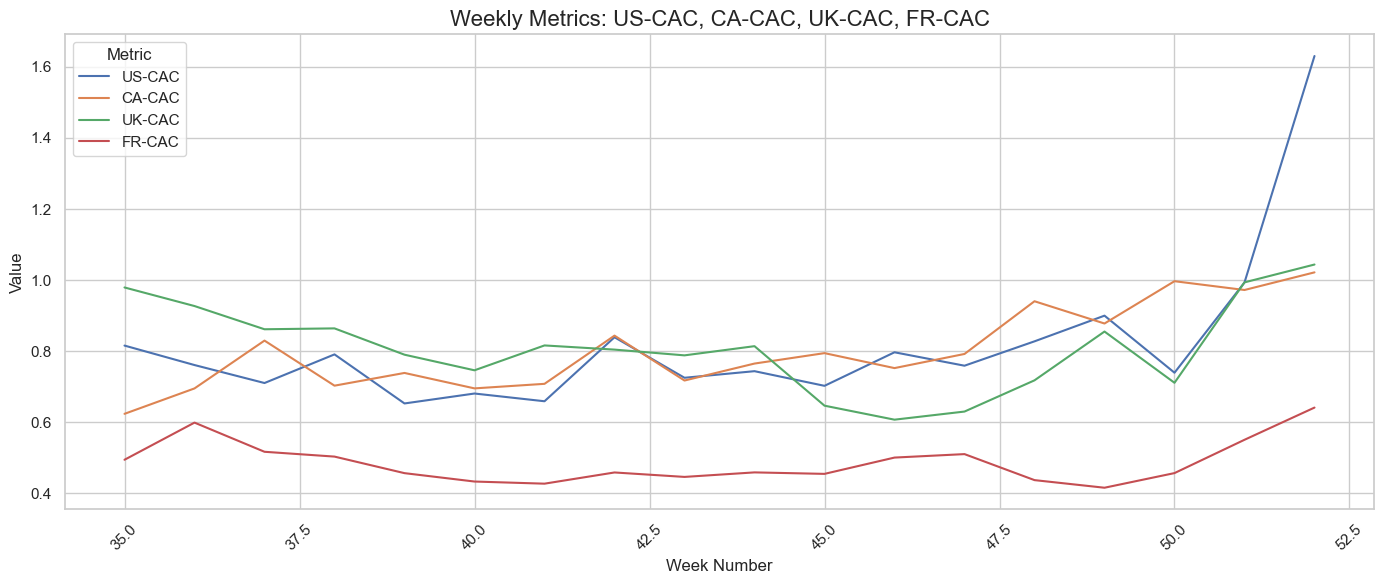

In [18]:
# Calculation CAC by countries

countries = ["US", "CA", "UK", "FR"]

for col in countries:
    overview[f"{col}-CAC"] = overview[f"{col}-Spend"] / overview[f"{col}-Signups"]
    
cac_cols = ["US-CAC", "CA-CAC", "UK-CAC", "FR-CAC"]

visualisation(cac_cols, overview)

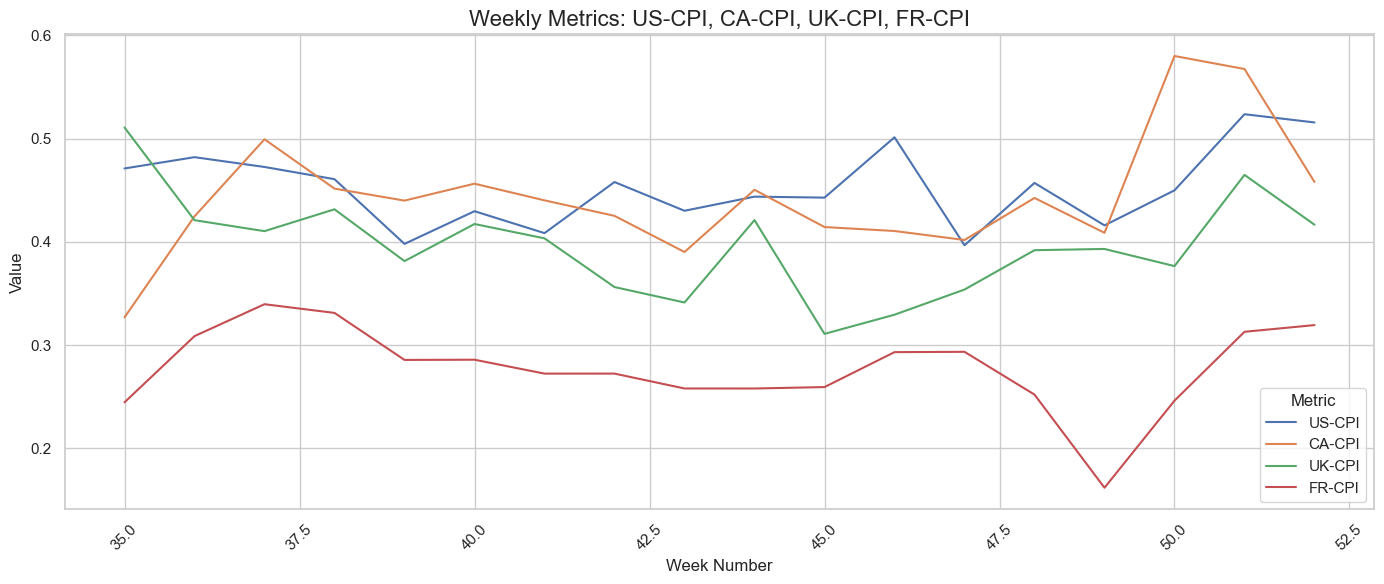

In [19]:
# Calculation CPI by countries

countries = ["US", "CA", "UK", "FR"]

cpi_cols = []

for col in countries:
    overview[f"{col}-CPI"] = overview[f"{col}-Spend"] / overview[f"{col}-Installs"]
    cpi_cols.append(f"{col}-CPI")

visualisation(cpi_cols, overview)

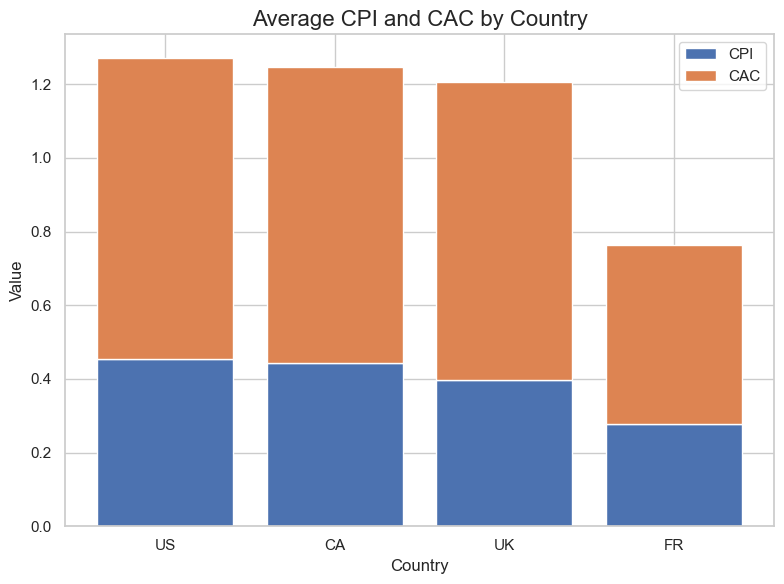

In [27]:
# Calculation for CAC  and CPI summary across counties

countries = ["US", "CA", "UK", "FR"]

for col in countries:
    c = col.lower()
    globals()[f"avg_cpi_{c}"] = overview[f"{col}-CPI"].mean()
    globals()[f"avg_cac_{c}"] = overview[f"{col}-CAC"].mean()


summary = pd.DataFrame({
    "Country": countries,
    "CPI": [globals()[f"avg_cpi_{c.lower()}"] for c in countries],
    "CAC": [globals()[f"avg_cac_{c.lower()}"] for c in countries]
})

# Visualisation
plt.figure(figsize=(8, 6))

# Bottom = CPI, top = CAC
plt.bar(summary["Country"], summary["CPI"], label="CPI")
plt.bar(summary["Country"], summary["CAC"], bottom=summary["CPI"], label="CAC")

plt.title("Average CPI and CAC by Country", fontsize=16)
plt.xlabel("Country")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

##  Social Media Channels breakdown

#### US

In [49]:
# Load 
us = pd.read_excel(file_path, sheet_name="US", header=1)
us = us.loc[:, ~us.columns.str.contains("Unnamed")]

# Data for zooming the last 3 weeks
'''
us["Week Number"] = us["Week Number"].replace({
    1: 53,
    2: 54,
    3: 55
})
'''
us = us.loc[:17]

In [50]:
us.head(2)

,Week Number,FB-iOS-Spend,FB-Android-Spend,Google-iOS-Spend,Google-Android-Spend,Apple-Ads-Spend,FB-iOS-Installs,FB-Android-Installs,Google-iOS-Installs,Google-Android-Installs,...,FB-Android-CAC,Google-iOS-CAC,Google-Android-CAC,Apple-Ads-CAC,Total Spend,Total Installs,Total Signups,% Signed up,CPI,CAC
0,35,62.2,114.0,0.0,0.0,37.4,94.0,169.0,0.0,0.0,...,1.045872,No SignUps,No SignUps,0.779167,213.6,374.0,216.0,0.577540,0.571123,0.988889
1,36,648.0,363.4,19.6,146.2,160.8,954.0,500.0,35.0,543.0,...,1.078338,0.890909,0.505882,0.883516,1338.0,2442.0,1547.0,0.633497,0.547912,0.864900


In [52]:
# Re-load all object into float

object_cols = us.select_dtypes(include="object").columns.tolist()

for col in object_cols:
    us[col] = pd.to_numeric(us[col], errors="coerce")

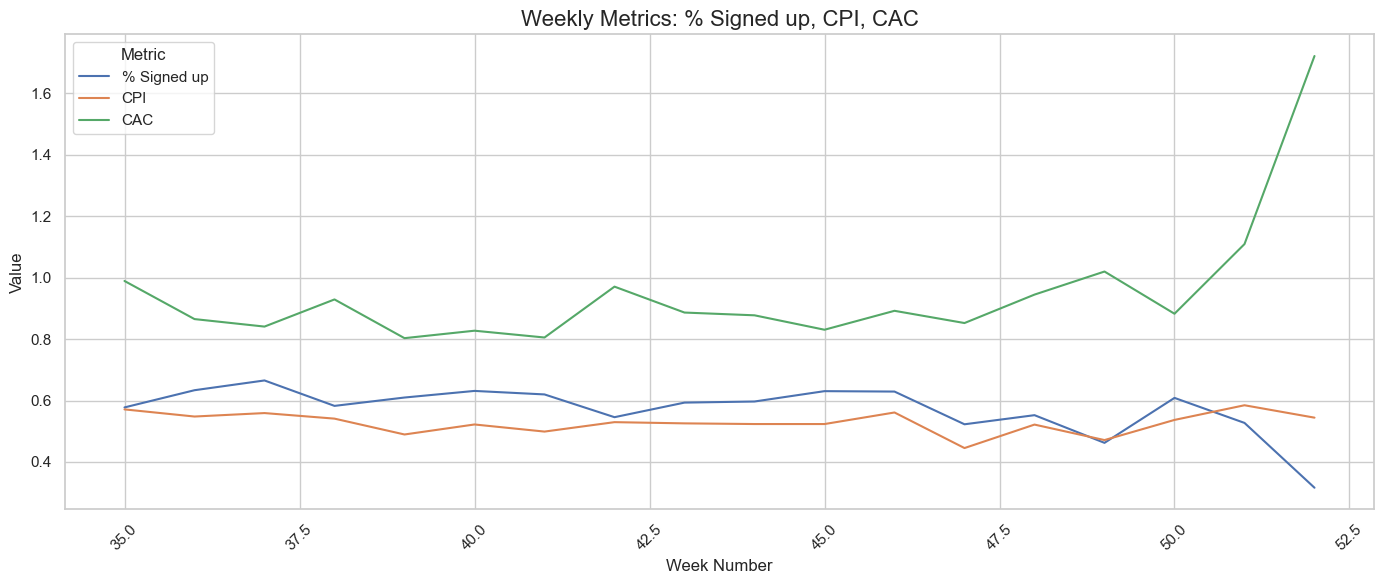

In [53]:
# Signed up, CPI, CAC over weeks 

us_metrics = ["% Signed up", "CPI", "CAC"]

visualisation(us_metrics, us)

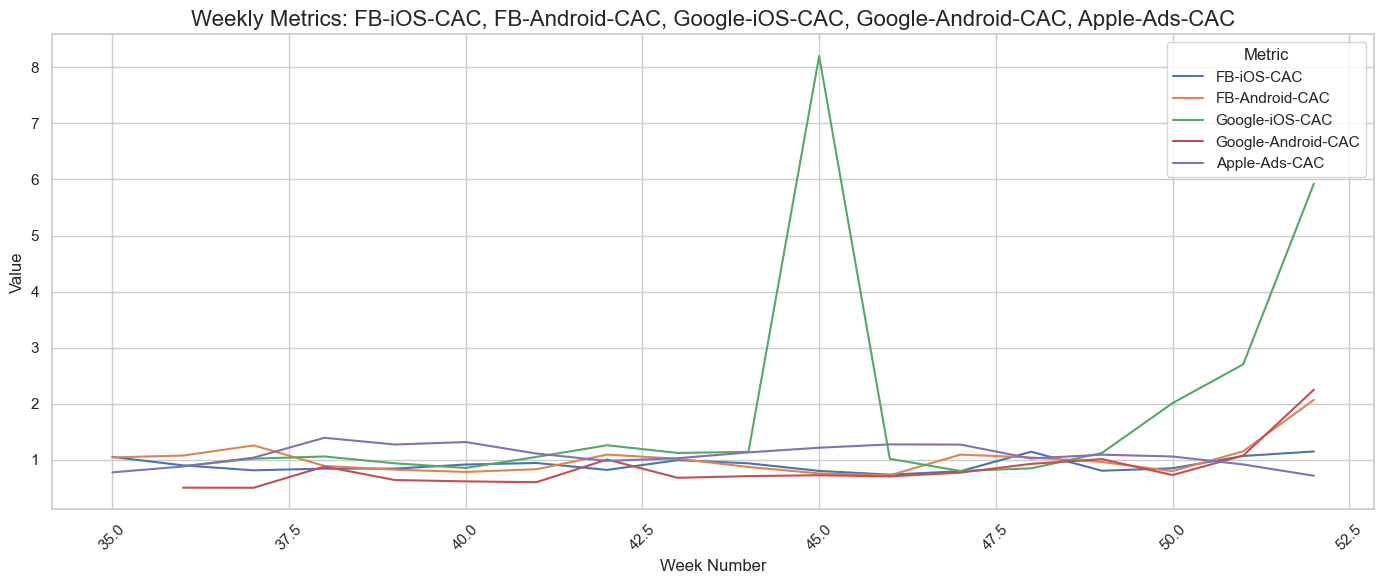

In [54]:
# CAC by channels over week

channels = ["FB-iOS-", "FB-Android-", "Google-iOS-", "Google-Android-", "Apple-Ads-"]

channels_cac = [f"{col}CAC" for col in channels]
  
visualisation(channels_cac, us)

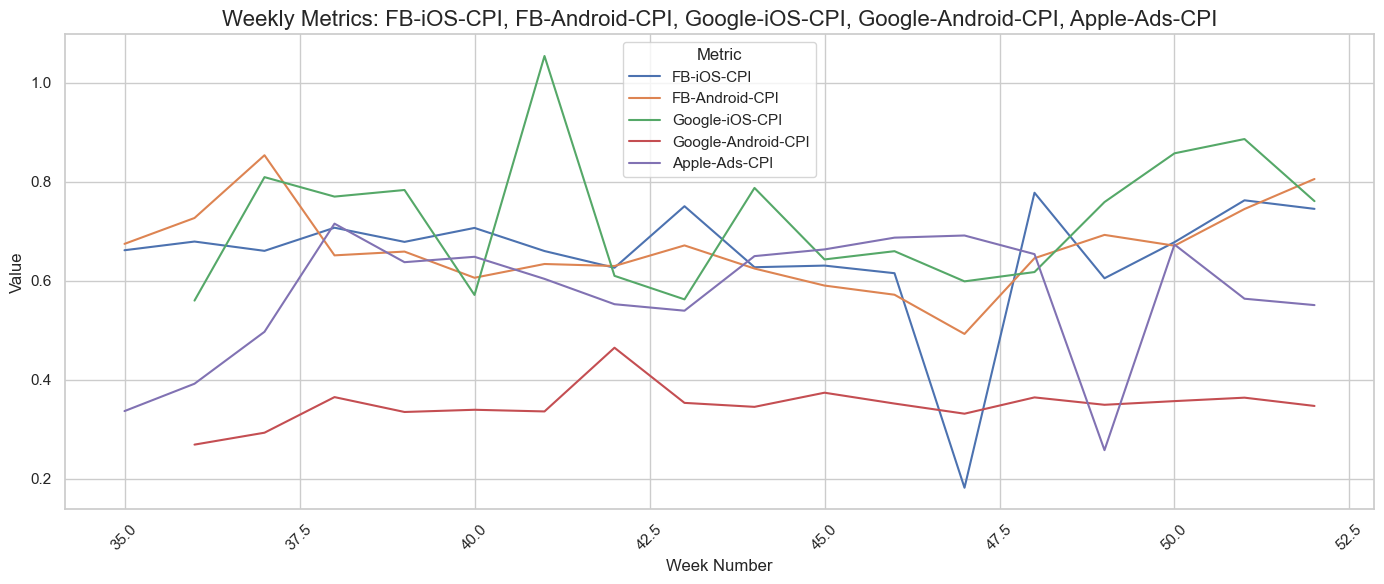

In [64]:
# CPI by channels over week

# CPI calculation
for col in channels:
    us[f"{col}CPI"] = us[f"{col}Spend"] / us[f"{col}Installs"]
    
channels_CPI = [f"{col}CPI" for col in channels ]

visualisation(channels_CPI, us)

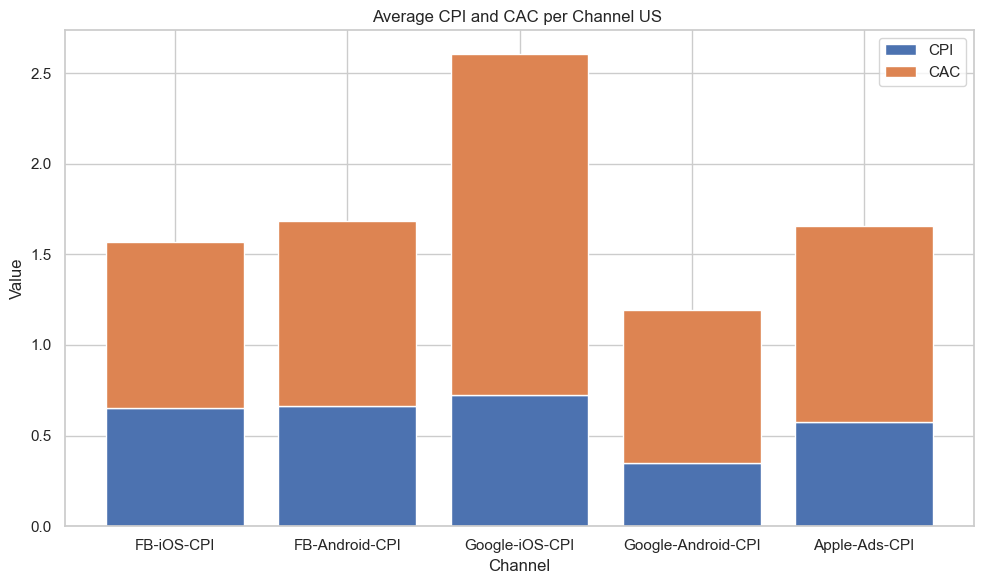

In [75]:
# Stacked bar char by channels 

avg_cpi_per_channel = us[channels_CPI].mean()
avg_cac_per_channel = us[channels_CAC].mean()

# Make sure indices align (same channel order)
channels = avg_cpi_per_channel.index

# Plot
plt.figure(figsize=(10,6))

plt.bar(
    channels,
    avg_cpi_per_channel,
    label="CPI",
    color="#4C72B0"
)

plt.bar(
    channels,
    avg_cac_per_channel,
    bottom=avg_cpi_per_channel,
    label="CAC",
    color="#DD8452"
)

plt.title("Average CPI and CAC per Channel US ")
plt.ylabel("Value")
plt.xlabel("Channel")
plt.legend()

plt.tight_layout()
plt.show()


### Rest of the countiries

In [112]:
counties = ["US", "CA", "UK", "FR"]
channels = ["FB-iOS-", "FB-Android-", "Google-iOS-", "Google-Android-", "Apple-Ads-"]

In [113]:
# Download all data

all_four = {}

for country in countries:
    temp = pd.read_excel(file_path, sheet_name=country, header=1)
    temp = temp.loc[:, ~temp.columns.str.contains("Unnamed")]
    temp = temp.loc[:17]

    # Convert all object columns to float
    object_cols = temp.select_dtypes(include="object").columns.tolist()
    for col in object_cols:
        temp[col] = pd.to_numeric(temp[col], errors="coerce")

    all_four[country] = temp

In [114]:
# Calculate CPI for each country and each channel

for country, df in all_four.items():
    for col in channels:
        df[f"{col}CPI"] = df[f"{col}Spend"] / df[f"{col}Installs"]

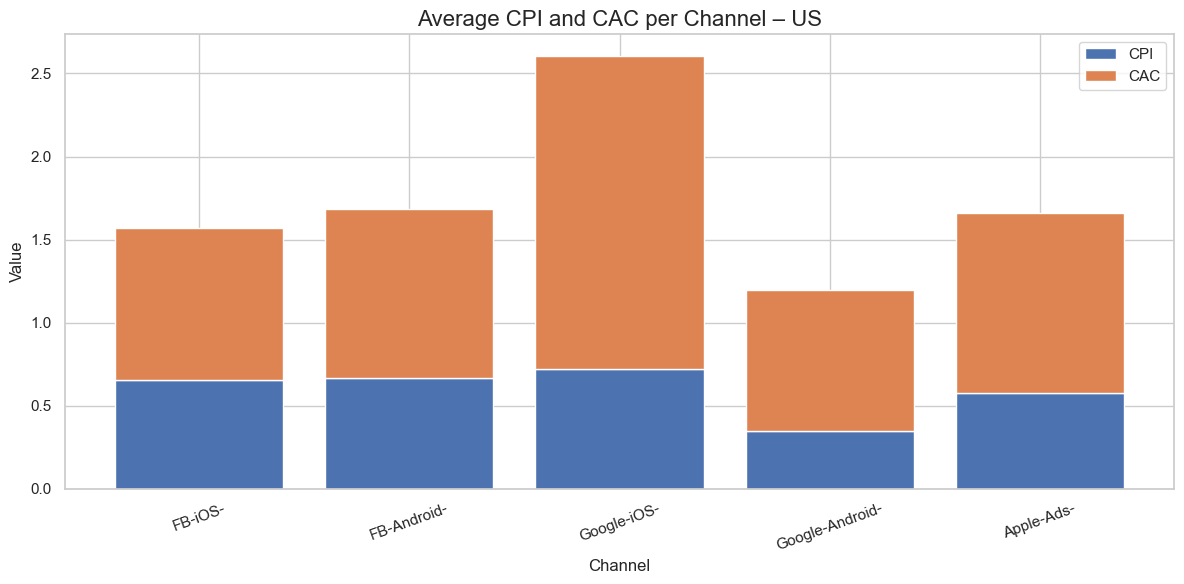

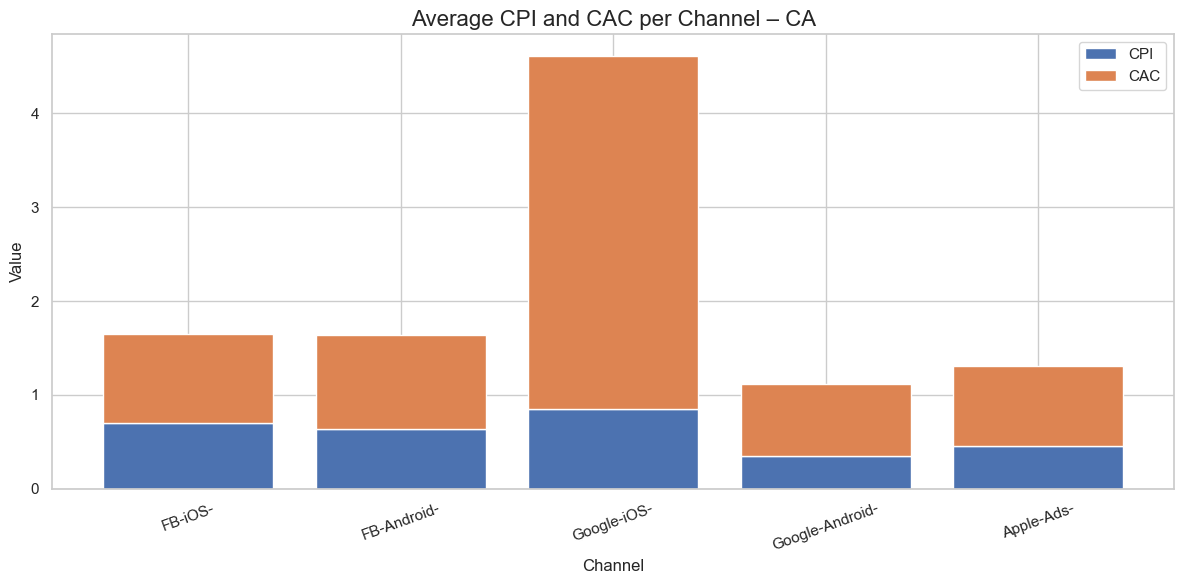

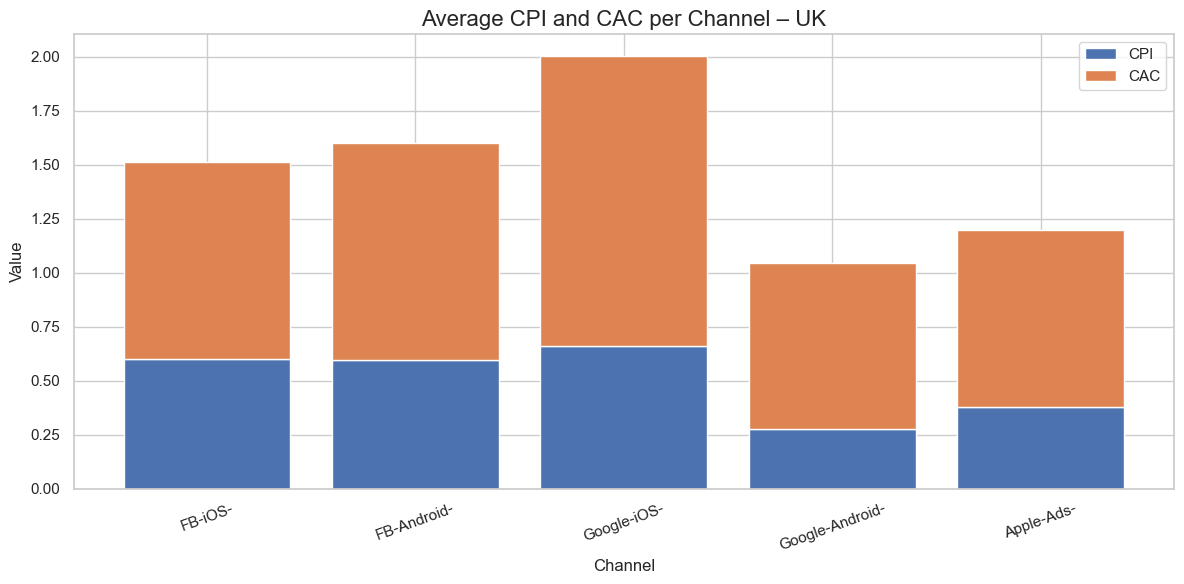

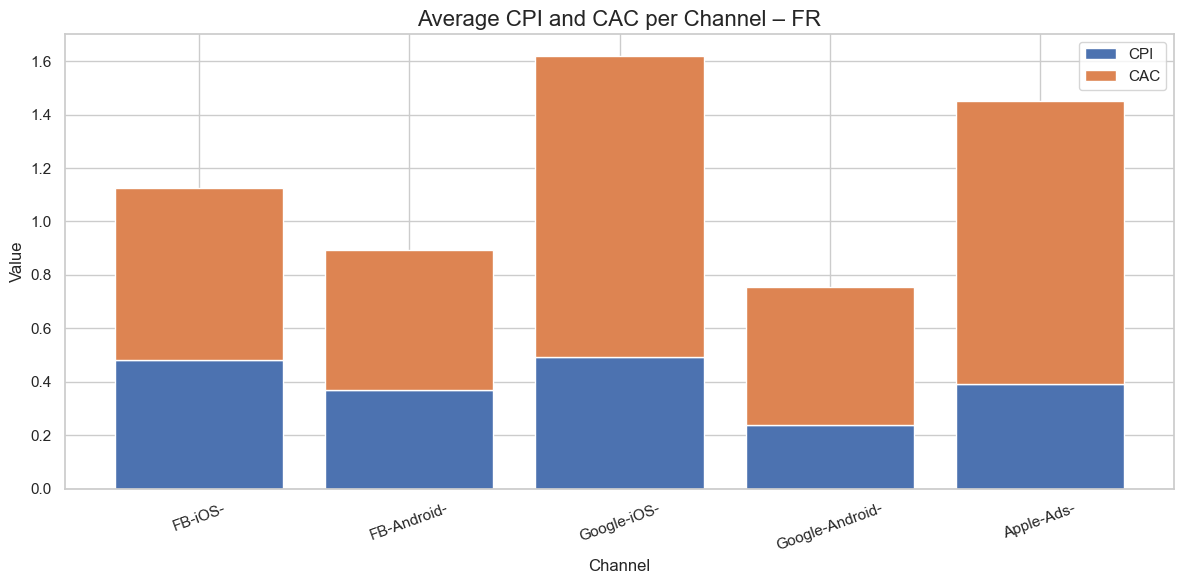

In [115]:
# Visualisation

for country, df in all_four.items():

    avg_cpi = [df[f"{ch}CPI"].mean() for ch in channels]
    avg_cac = [df[f"{ch}CAC"].mean() for ch in channels]   # <-- assumes CAC already exists in the sheet

    plt.figure(figsize=(12, 6))

    # CPI bar
    plt.bar(channels, avg_cpi, label="CPI")

    # CAC stacked on top
    plt.bar(channels, avg_cac, bottom=avg_cpi, label="CAC")

    plt.title(f"Average CPI and CAC per Channel – {country}", fontsize=16)
    plt.xlabel("Channel")
    plt.ylabel("Value")
    plt.xticks(rotation=20)
    plt.legend()
    plt.tight_layout()
    plt.show()

###  Allocation to minimize spend

In [104]:
# Join together all metrics

rows = []
data = []

for country, df in all_four.items():
    for ch in channels:
        row_name = f"{country}-{ch}"

        cpi = df[f"{ch}CPI"].mean()
        cac = df[f"{ch}CAC"].mean()

        rows.append(row_name)
        data.append([cac, cpi])

summary_by_channel = pd.DataFrame(data, index=rows, columns=["CAC", "CPI"])
summary_by_channel

,CAC,CPI
US-FB-iOS-,0.914524,0.653068
US-FB-Android-,1.018676,0.663662
US-Google-iOS-,1.882567,0.722986
US-Google-Android-,0.845697,0.349596
US-Apple-Ads-,1.085990,0.573085
CA-FB-iOS-,0.947198,0.700938
CA-FB-Android-,0.999357,0.636208
CA-Google-iOS-,3.760248,0.852314
CA-Google-Android-,0.765125,0.349415
CA-Apple-Ads-,0.847742,0.457761


In [118]:
# CAC-Minimized Allocation


opt_cac = summary_by_channel.copy()

opt_cac["inv_cac"] = 1 / df_cac["CAC"]
opt_cac["weight"] = opt_cac["inv_cac"] / opt_cac["inv_cac"].sum()
opt_cac["pct_budget_cac"] = opt_cac["weight"] * 100

opt_cac = opt_cac.sort_values("pct_budget_cac", ascending=False)


# CPI-Minimized Allocation

opt_cpi = summary_by_channel.copy()

opt_cpi["inv_cpi"] = 1 / opt_cpi["CPI"]
opt_cpi["weight"] = opt_cpi["inv_cpi"] / opt_cpi["inv_cpi"].sum()
opt_cpi["pct_budget_cpi"] = opt_cpi["weight"] * 100

opt_cpi = opt_cpi.sort_values("pct_budget_cpi", ascending=False)

# Combine Results 

optimized = summary_by_channel.copy()
optimized["pct_budget_cac"] = opt_cac["pct_budget_cac"]
optimized["pct_budget_cpi"] = opt_cpi["pct_budget_cpi"]

#print(optimized)
#print(opt_cpi)
#print(opt_cac)


In [119]:
print(opt_cac)

                         CAC       CPI   inv_cac    weight  pct_budget_cac
FR-Google-Android-  0.518608  0.236509  1.928238  0.087331        8.733102
FR-FB-Android-      0.526500  0.368316  1.899337  0.086022        8.602208
FR-FB-iOS-          0.643788  0.482186  1.553306  0.070350        7.035013
CA-Google-Android-  0.765125  0.349415  1.306976  0.059194        5.919369
UK-Google-Android-  0.769141  0.276326  1.300151  0.058885        5.888461
UK-Apple-Ads-       0.823924  0.376518  1.213704  0.054969        5.496935
US-Google-Android-  0.845697  0.349596  1.182456  0.053554        5.355413
CA-Apple-Ads-       0.847742  0.457761  1.179604  0.053425        5.342498
UK-FB-iOS-          0.913458  0.600027  1.094742  0.049581        4.958149
US-FB-iOS-          0.914524  0.653068  1.093465  0.049524        4.952366
CA-FB-iOS-          0.947198  0.700938  1.055746  0.047815        4.781534
CA-FB-Android-      0.999357  0.636208  1.000643  0.045320        4.531973
UK-FB-Android-      1.008